# House Price Prediction Regression Project

## Project Goal

## Load Modules

In [103]:
# load below libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load dataset

In [2]:
train_data_path = r"C:\Users\NXG TECH\Desktop\House_Price_Prediction\Data\train.csv"
test_data_path = r"C:\Users\NXG TECH\Desktop\House_Price_Prediction\Data\test.csv"
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
print("shape of df_train: ",df_train.shape)
print("shape of df_test: ",df_test.shape)


shape of df_train:  (1460, 81)
shape of df_test:  (1459, 80)


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know Your Data

## Data Integration

In [6]:
df = pd.concat([df_train,df_test])
print("shape of Integrated Data/DF: ",df.shape)


shape of Integrated Data/DF:  (2919, 81)


In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get brief information of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:",int_features.shape[0])
print("Integer feature name",int_features.tolist())

Total number of integer features: 26
Integer feature name ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of float features:",float_features.shape[0])
print("float feature name",float_features.tolist())

Total number of float features: 12
float feature name ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:",cat_features.shape[0])
print("categorical feature name",cat_features.tolist())

Total number of categorical features: 43
categorical feature name ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statical information of numerical Features

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [14]:
df.describe().shape

(8, 38)

## Data Cleaning

## Visualise Null/Missing Values

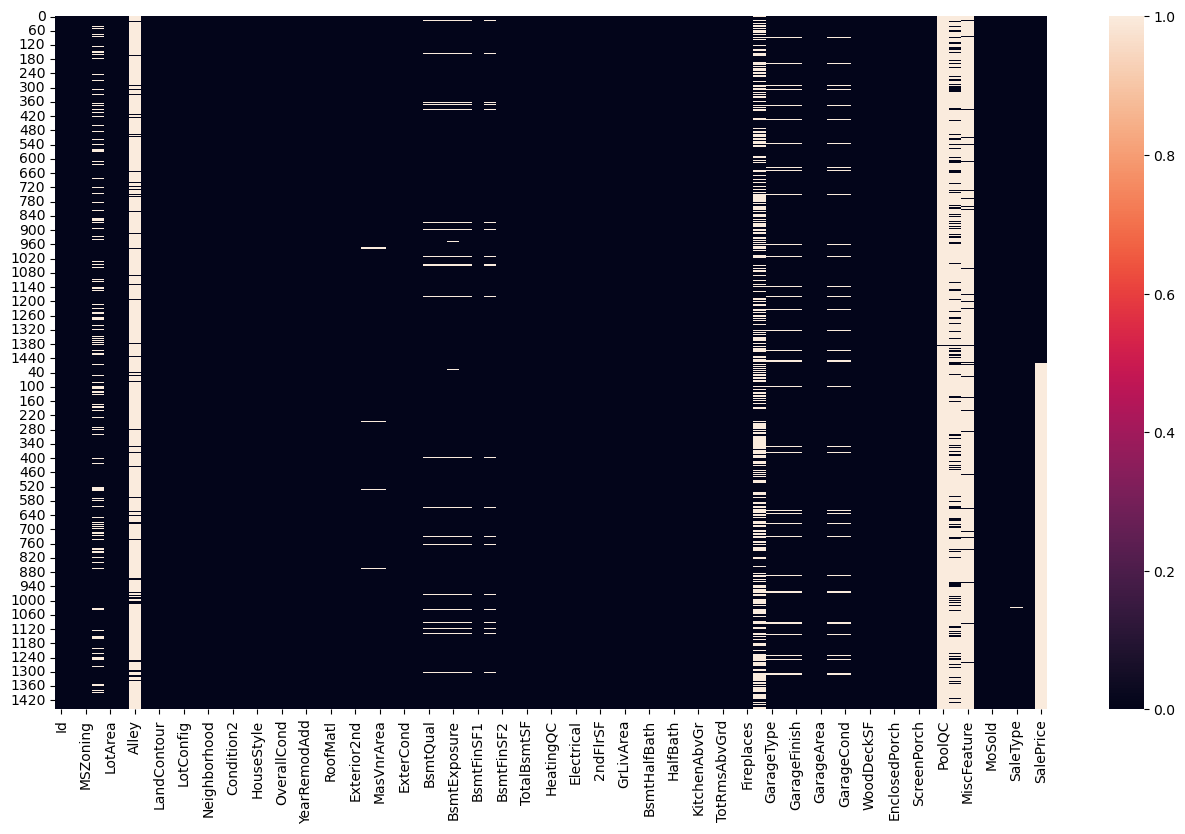

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_value.png")

## Get the null value Percentage for every features

In [16]:
df=df.set_index("Id")

In [17]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [18]:
null_percentage = df.isnull().sum()/df.shape[0]*100
null_percentage

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Column/Features
As per observation,we will not drop any feature from dataset

In [19]:
"""""AS PER DOMAIN KNOWELDGE WE WILL NOT DROP FEATURE AND WE WILL ADD CONSTANT VALUE"""""
miss_value_50_perc = null_percentage[null_percentage > 50]
miss_value_50_perc

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [20]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [21]:
"""""AS PER DOMAIN KNOWELDGE WE WILL NOT DROP FEATURE AND WE WILL ADD CONSTANT VALUE"""""
miss_value_20_50_perc = null_percentage[(null_percentage > 20) & (null_percentage <51 )]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [22]:
miss_value_5_20_perc = null_percentage[(null_percentage > 5) & (null_percentage <20 )]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [23]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

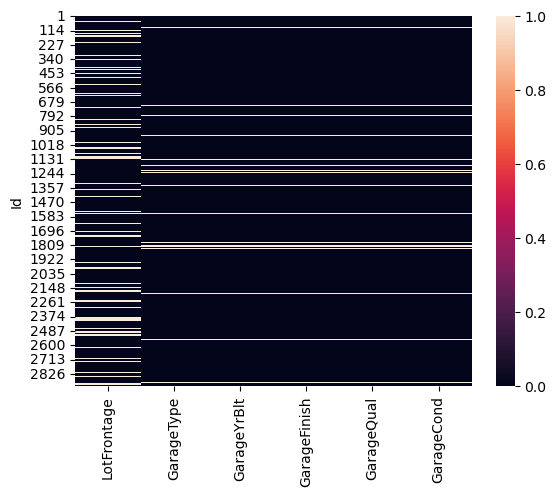

In [24]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## Missing Value Imputation

In [25]:
missing_value_feature = null_percentage[null_percentage > 0]
print("total missing value features", len(missing_value_feature))

total missing value features 35


In [26]:
missing_value_feature

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [27]:
cat_na_features = missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print("total number of categorical missing features:",len(cat_na_features))

total number of categorical missing features: 23


In [28]:
cat_na_features

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [29]:
int_na_features = missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("total number of integer missing features:",len(int_na_features))

total number of integer missing features: 0


In [30]:
int_na_features

Series([], dtype: float64)

In [31]:
float_na_features = missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("total number of floating missing features:",len(float_na_features))

total number of floating missing features: 12


In [32]:
float_na_features 

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZOING = 0.137033

In [33]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [34]:
## Backup of original data
df_mvi=df.copy()
df_mvi.shape

(2919, 80)

In [35]:
MSZoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,MSZoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

## Handling Alley=93.21


In [36]:
df_mvi["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [37]:
Alley_cont="NA"
df_mvi["Alley"].replace(np.nan,"NA",inplace=True)
df_mvi["Alley"].isnull().sum()

0

## Handling LotFrontage=16.64

## when there is a data which right or left scude take median value

In [38]:
lot_frontage=df["LotFrontage"].mean()
lot_frontage

69.30579531442663

In [39]:
df_mvi["LotFrontage"].replace(np.nan,lot_frontage,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

## Feature Transformation
## Convert Numerical to Categorical Feature

In [40]:
for_num_conv = ["MSSubClass", "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [41]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [42]:
df_mvi["MoSold"].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [43]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [44]:
calendar.month_abbr[12]

'Dec'

In [45]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [46]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## Convert Categorical to Numerical Features
## Ordinal Encoding

In [47]:
ordinal_end_var=[
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
]
print("total features for coversion :" ,len(ordinal_end_var))


total features for coversion : 11


In [48]:

##df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [49]:
df_mvi["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [50]:
df_mvi["ExternalQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [51]:
df_mvi["ExternalQual"].value_counts()

2    1798
3     979
4     107
1      35
Name: ExternalQual, dtype: int64

In [52]:
df_mvi["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [53]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["No","NA","Mn","Av","Gd"],ordered=True)).cat.codes

In [54]:
df_mvi["BsmtExposure"].value_counts()

 0    1904
 3     418
 4     276
 2     239
-1      82
Name: BsmtExposure, dtype: int64

In [55]:
df_mvi["ExternalQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [56]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One Hot Encoding for nominal Categorical data

In [90]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("ToTAL DATA TYPE FEATURES :",len(object_features))
print("features :\n",object_features)

ToTAL DATA TYPE FEATURES : 47
features :
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [91]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal


In [92]:
df_encod=pd.get_dummies(df_encod,columns=object_features,prefix=object_features,drop_first=True)

In [94]:
## pd.get_dummies(df_encod["Alley"],columns="Alley",prefix="Alley", drop_first=False)

In [78]:
## df_encod["MSZoning"].value.counts()

## Split Data for training and testing

In [95]:
df_encod.shape

(2919, 548)

In [99]:
len_train=df_train.shape[0]
len_train

1460

In [102]:
x_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]

x_test=df_encod[len_train:].drop("SalePrice",axis=1)
print("shape of x_train data: ",x_train.shape)
print("shape of y_train data: ",y_train.shape)
print("shape of x_train data: ",x_test.shape)


shape of x_train data:  (1460, 547)
shape of y_train data:  (1460,)
shape of x_train data:  (1459, 547)


## Feature Scaling

In [104]:
sc=StandardScaler()
sc.fit(x_train)
# FORMULA z=(x-u)/s
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [105]:
x_train[:3,:]

array([[-0.22335706, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [106]:
x_test[:3,:]

array([[ 0.45789401,  0.11076257, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [107]:
sc.mean_

array([6.99179459e+01, 1.05168281e+04, 6.09931507e+00, 5.57534247e+00,
       1.03685262e+02, 3.46369863e+00, 9.51369863e-01, 4.43639726e+02,
       4.65493151e+01, 5.67240411e+02, 1.05742945e+03, 1.16262671e+03,
       3.46992466e+02, 5.84452055e+00, 1.51546370e+03, 4.25342466e-01,
       5.75342466e-02, 1.56506849e+00, 3.82876712e-01, 2.86643836e+00,
       1.04657534e+00, 6.51780822e+00, 6.13013699e-01, 1.76712329e+00,
       4.72980137e+02, 9.42445205e+01, 4.66602740e+01, 2.19541096e+01,
       3.40958904e+00, 1.50609589e+01, 2.75890411e+00, 4.34890411e+01,
       2.39589041e+00, 0.00000000e+00, 4.31506849e-02, 6.84931507e-03,
       2.05479452e-02, 3.67123288e-01, 4.72602740e-02, 2.73972603e-03,
       8.21917808e-03, 9.86301370e-02, 2.04794521e-01, 4.10958904e-02,
       1.09589041e-02, 3.97260274e-02, 1.36986301e-02, 3.56164384e-02,
       4.45205479e-02, 1.09589041e-02, 7.88356164e-01, 1.49315068e-01,
       9.95890411e-01, 9.37671233e-01, 2.80821918e-02, 2.80821918e-02,
      

In [108]:
sc.mean_.shape

(547,)

In [109]:
sc.n_features_in_

547

In [110]:
sc.n_samples_seen_

array([1460, 1460, 1460, 1460, 1452, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 14

In [111]:
sc.scale_

array([2.20183141e+01, 9.97784611e+03, 1.38252284e+00, 1.11241818e+00,
       1.81003845e+02, 9.84494873e-01, 1.50468384e+00, 4.55941866e+02,
       1.61264017e+02, 4.41715605e+02, 4.38555057e+02, 3.86455322e+02,
       4.36378914e+02, 4.86064268e+01, 5.25300394e+02, 5.18732867e-01,
       2.38670868e-01, 5.50727099e-01, 5.02713131e-01, 8.15498620e-01,
       2.20262727e-01, 1.62483655e+00, 6.44445572e-01, 7.47059036e-01,
       2.13731608e+02, 1.25295863e+02, 6.62333334e+01, 6.10982138e+01,
       2.93072887e+01, 5.57383170e+01, 4.01635452e+01, 4.95953090e+02,
       5.74083750e-01, 1.00000000e+00, 2.03196219e-01, 8.24766752e-02,
       1.41865172e-01, 4.82020518e-01, 2.12195053e-01, 5.22706412e-02,
       9.02863400e-02, 2.98164775e-01, 4.03551391e-01, 1.98512010e-01,
       1.04109589e-01, 1.95314798e-01, 1.16236731e-01, 1.85331885e-01,
       2.06248561e-01, 1.04109589e-01, 4.08473650e-01, 3.56398764e-01,
       6.39742160e-02, 2.41751715e-01, 1.65207694e-01, 1.65207694e-01,
      

In [112]:
sc.var_

array([4.84806156e+02, 9.95574129e+07, 1.91136939e+00, 1.23747420e+00,
       3.27623920e+04, 9.69230156e-01, 2.26407347e+00, 2.07882985e+05,
       2.60060832e+04, 1.95112676e+05, 1.92330538e+05, 1.49347716e+05,
       1.90426557e+05, 2.36258473e+03, 2.75940503e+05, 2.69083787e-01,
       5.69637831e-02, 3.03300338e-01, 2.52720492e-01, 6.65038000e-01,
       4.85156690e-02, 2.64009383e+00, 4.15310096e-01, 5.58097204e-01,
       4.56812003e+04, 1.56990532e+04, 4.38685445e+03, 3.73299173e+03,
       8.58917168e+02, 3.10675998e+03, 1.61311037e+03, 2.45969468e+05,
       3.29572152e-01, 0.00000000e+00, 4.12887033e-02, 6.80240195e-03,
       2.01257272e-02, 2.32343779e-01, 4.50267405e-02, 2.73221993e-03,
       8.15162319e-03, 8.89022331e-02, 1.62853725e-01, 3.94070182e-02,
       1.08388065e-02, 3.81478701e-02, 1.35109777e-02, 3.43479077e-02,
       4.25384688e-02, 1.08388065e-02, 1.66850722e-01, 1.27020079e-01,
       4.09270032e-03, 5.84438919e-02, 2.72935823e-02, 2.72935823e-02,
      

In [113]:
sc.with_std

True

## train ML Model

In [130]:
!pip install xgboost

In [133]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression

from xgboost import XGBRegressor


In [137]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
mlpr=MLPRegressor()
ir=IsotonicRegression()
xgbr=XGBRegressor()




In [141]:
models={"a":["LinearRegression", lr],
        "b":["SGDRegressor",sgdr],
        "c":["KNeighborsRegressor",knr],
        "d":["GaussianProcessRegressor",gpr],
        "e":["DecisionTreeRegressor",dtr],
        "f":["GradientBoostingRegressor",gbr],
        "g":["RandomForestRegressor",rfr],
        "h":["MLPRegressor",mlpr],
        "i":["XGBRegressor",xgbr],
        "j":["SVR",svr],
        "k":["IsotonicRegression", ir]
       }

## CROSS VALIDATION CODE

In [146]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score=cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [157]:
##models_score = []
##for model in models:
##    print("Training model:", models[model][0])
 ##   score = test_model(models[model][1],x_train,y_train)
    ##print("score of model:",score)
    ##models_score.append([models[model][0],score[0]])

In [156]:
models_score

[]

## GradientBoostingRegressor is the best model which gives us best accuracy